In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def generate_dataset(n, alpha):
    dataset = {'0': [], '1': []}
    for _ in range(int(alpha*n)):
        dataset['0'].append(np.random.binomial(p=mean_arms[0], n=1))
    for _ in range(n - int(alpha*n)):
        dataset['1'].append(np.random.binomial(p=mean_arms[1], n=1))
    return dataset

In [4]:
regret_data = []
num_iters = 100
T = 1000
n = 200
delta = .1
alpha = .5
mean_arms = [.5, .5-delta]

for i in range(num_iters):
    dataset = generate_dataset(n, alpha)
    simple_mean = np.asarray([max(0.0,np.mean(dataset['0'])), max(0.0,np.mean(dataset['1']))])
    simple_select = np.asarray([len(dataset['0']), len(dataset['1'])])
    
    online_mean = np.asarray([0.0,0.0])
    online_select = np.asarray([0,0])
    online_data_index = np.asarray([0,0])
    online_regret_index = 0
    simple_regret = 0
    online_regret = 0
    
    for t in range(T):
        
        simple_ucb = np.asarray([simple_mean[i] + (1 / np.sqrt(simple_select[i])) \
                                     if simple_select[i] > 0 else np.inf for i in range(2)])
        simple_arm = np.argmax(simple_ucb)
        simple_regret += mean_arms[0] - mean_arms[simple_arm]
        regret_data.append({'Algo': 'Simple', 'Iter': i, 't': t, 'Regret': simple_regret})
        simple_obs = np.random.binomial(p=mean_arms[simple_arm], n = 1)
        simple_mean[simple_arm] = (simple_mean[simple_arm]*simple_select[simple_arm] + simple_obs) / (simple_select[simple_arm]+1)
        simple_select[simple_arm] += 1
        
        
        
        online_ucb = np.asarray([online_mean[i] + (1 / np.sqrt(online_select[i])) \
                                    if online_select[i] > 0 else np.inf for i in range(2)])
        online_arm = np.argmax(online_ucb)
        if online_data_index[online_arm] < len(dataset[str(online_arm)]):
            online_obs = dataset[str(online_arm)][online_data_index[online_arm]]
            online_mean[online_arm] = (online_select[online_arm]*online_mean[online_arm] + online_obs) / (online_select[online_arm]+1)
            online_select[online_arm] += 1
            online_data_index[online_arm] += 1
        
        else:
            online_obs = np.random.binomial(p=mean_arms[simple_arm], n = 1)
            online_regret += mean_arms[0] - mean_arms[simple_arm]
            regret_data.append({'Algo': 'Online', 'Iter': i, 't': online_regret_index, 'Regret': online_regret})
            
            online_mean[online_arm] = (online_select[online_arm]*online_mean[online_arm] + online_obs) / online_select[online_arm]
            online_select[online_arm] += 1
            online_regret_index += 1


<AxesSubplot:xlabel='t', ylabel='Regret'>

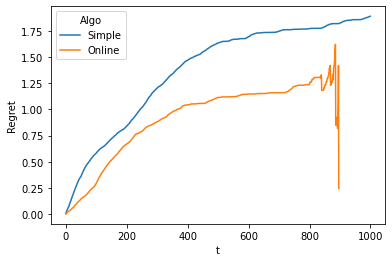

In [5]:
df = pd.DataFrame(regret_data)
sns.lineplot(data = df, x="t", y="Regret", hue="Algo", ci=None)